## Ayush Mittal
## Task - Prediction using Decision Tree Algorithm
## GRIP - The Sparks Foundation

What is Decision Tree?

Decision Tree is a Supervised learning technique. Decision tree classifier is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.


# Importing libraries and Dataset 

In [20]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_absolute_error

In [2]:
iris = load_iris()

In [3]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target,columns=['Species'])

# Understanding Data

In [4]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
print('classes to predict:',iris.target_names)

classes to predict: ['setosa' 'versicolor' 'virginica']


In [7]:
def change(value):
  if value==0:
    return 'Setosa'
  elif value==1:
    return 'Versicolor'
  else:
    return 'Virginica'

In [8]:
df = pd.concat([X,y['Species'].apply(lambda x: change(x))],axis=1)

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df['Species'].value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: Species, dtype: int64

* As we can see that iris dataset is a Balanced Dataset (as the number of data points for every class is 50)

## 2D Scatter Plot

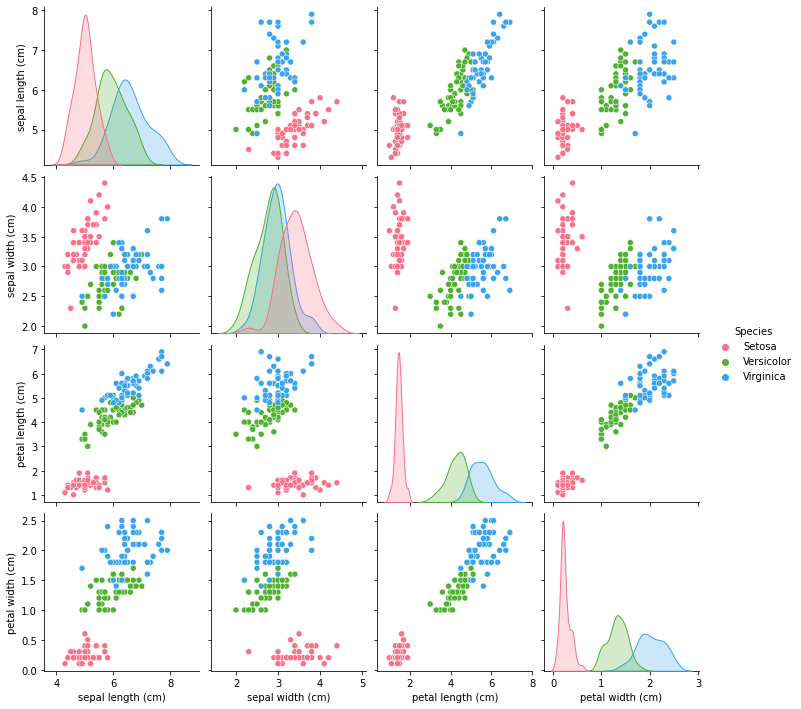

In [13]:
sns.pairplot(df,hue='Species',palette='husl')

**Observation(s):**
* The diagonal plot which showcases the histogram, allows us to see the PDF(Probability density function) or Probability distribution of a single variable.
* Magenta points can be easily separated from Blue and Green by drawing a line.
* But Blue and Green data points cannot be easily separated.
* Using any two features like, sepal_length and sepal_width, we can distinguish Setosa flowers from others.
* Separating Versicolor from Viginica is much harder as they have considerable overlap.




# Making Model 

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.25,random_state=42)

In [24]:
clf_gini = DecisionTreeClassifier()
clf_entropy = DecisionTreeClassifier(criterion='entropy')

I am choosing two different criterion *gini* and *entropy* , used in splitting, see [here](https://quantdare.com/decision-trees-gini-vs-entropy/) to know the difference.

In [25]:
clf_entropy.fit(xtrain,ytrain)
clf_gini.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
print('Accuracy of training data (criterion gini):',clf_gini.score(xtrain,ytrain))
print('Accuracy of testing data (criterion gini):',clf_gini.score(xtest,ytest))

Accuracy of training data (criterion gini): 1.0
Accuracy of testing data (criterion gini): 1.0


In [28]:
print('Accuracy of training data (criterion entropy):',clf_entropy.score(xtrain,ytrain))
print('Accuracy of testing data (criterion entropy):',clf_entropy.score(xtest,ytest))

Accuracy of training data (criterion entropy): 1.0
Accuracy of testing data (criterion entropy): 0.9736842105263158


* So we have trained our model and got a good accuracy, but something is missing!!!.
* Yes Tree, let's visualize the tree.
* To Visualize the Decision Tree, first have to install package called "pydotplus" and import other modules. 


In [30]:
!pip install pydotplus

In [31]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

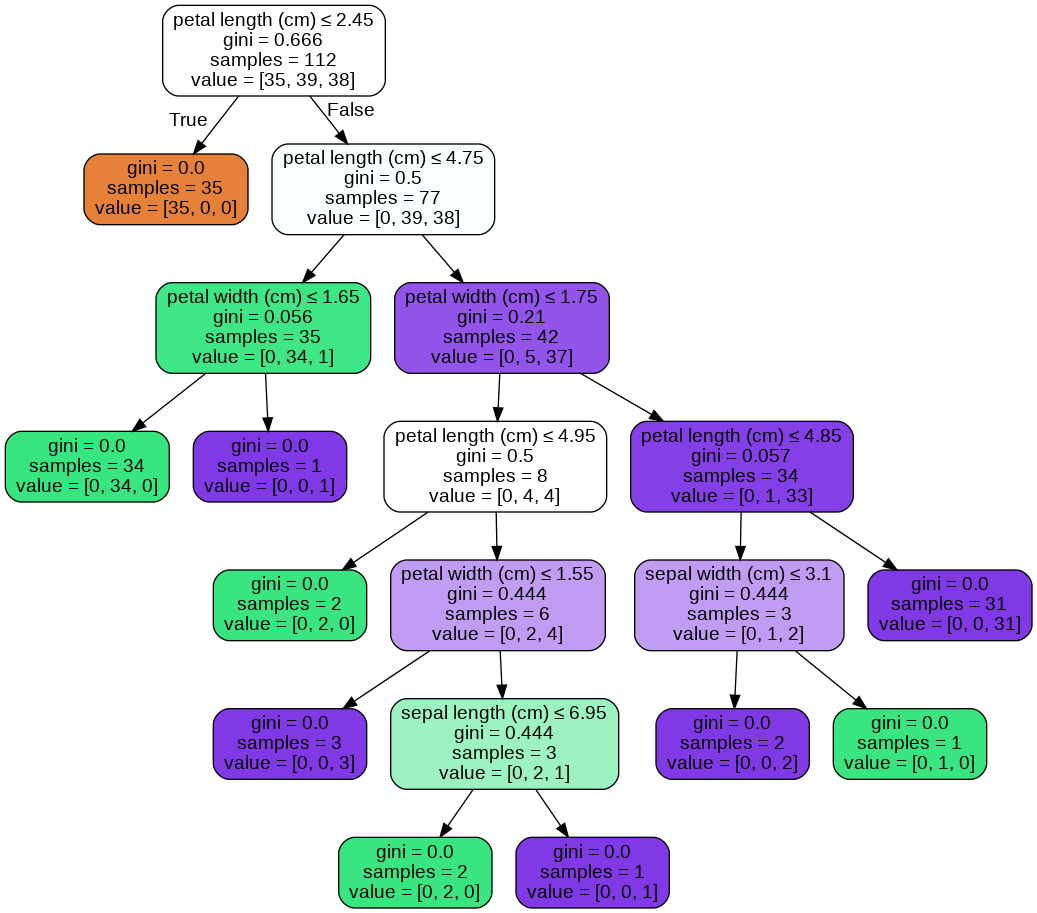

In [33]:
dot_data = StringIO()
export_graphviz(clf_gini,out_file=dot_data,
                filled=True,rounded=True,special_characters=True,
                feature_names=iris.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

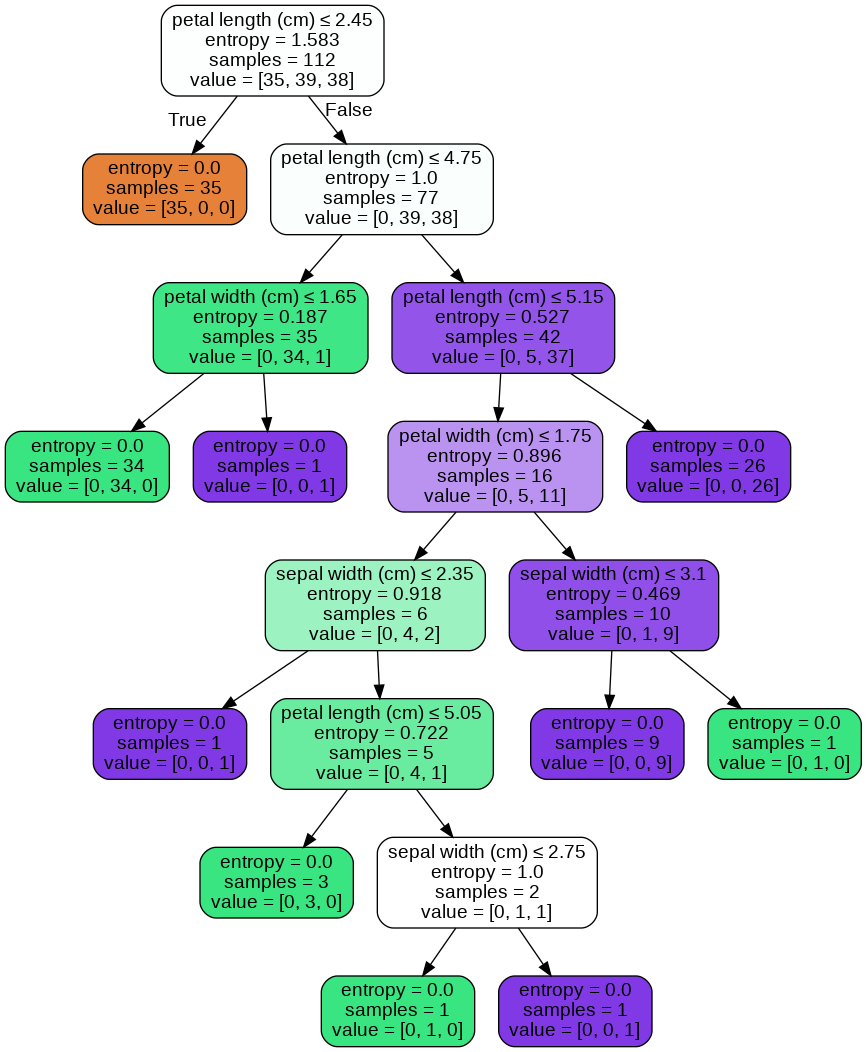

In [34]:
dot_data = StringIO()
export_graphviz(clf_entropy,out_file=dot_data,
                filled=True,rounded=True,special_characters=True,
                feature_names=iris.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Conclusion: 
**Finally our *Decision Tree* is here, using the above decision tree(s) we can predict the right class accordingly